## Tutorial - VHIP Network Analysis
### This package can be used to visualize the output of VHIP 2.0. Options include prediction heatmaps, probability heatmaps, and network graphs. There are also functions to calculate statistics for the networks, such as centrality. The steps below describe how to achieve each of these.

#### Import libraries

In [27]:
from VirusHostNetworkAnalysis import *
from VirusHostNetworkAnalysis.prediction_matrix import *

#### Create a matrix object by passing in the data file that is output by VHIP 2.0.
#### The data will be the result of running VHIP 2.0. If VHIP 2.0 was run correctly, there should be 7 columns in the dataset.
#### This tutorial will use the Aug4_predictions.tsv file from the sample input files folder.

In [28]:
aug4_data = PredictionMatrix("Sample_Input/Aug4_predictions.tsv")

#### Function make_rectangular_matrix() can be called with argument "prediciton" to make a prediciton matrix or with argument "probability" to make the probability matrix. This tool has functions built into it that will transform the input data, where each row represents a virus:host pair, into a matrix where hosts are columns and viruses are rows. The resulting matrix will likley be very tall, as it is common for an area to have many more viruses than hosts.
#### The example below uses the prediction matrix.

In [29]:
aug4_data.make_rectangular_matrix('prediction')

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

#### Because the number of viruses and hosts are inbalanced, it is possible to convert the matrix to a square by expanding the rows and columns. To do this, viruses are added as columns and hosts are added as rows, and it is assumed for the purpose of this project that virus-virus and host-host interactions are non-existent. Although these relationships might exist in the wild, this project is only looking into virus-host interactions. The image below shows how the matrix is expanded.

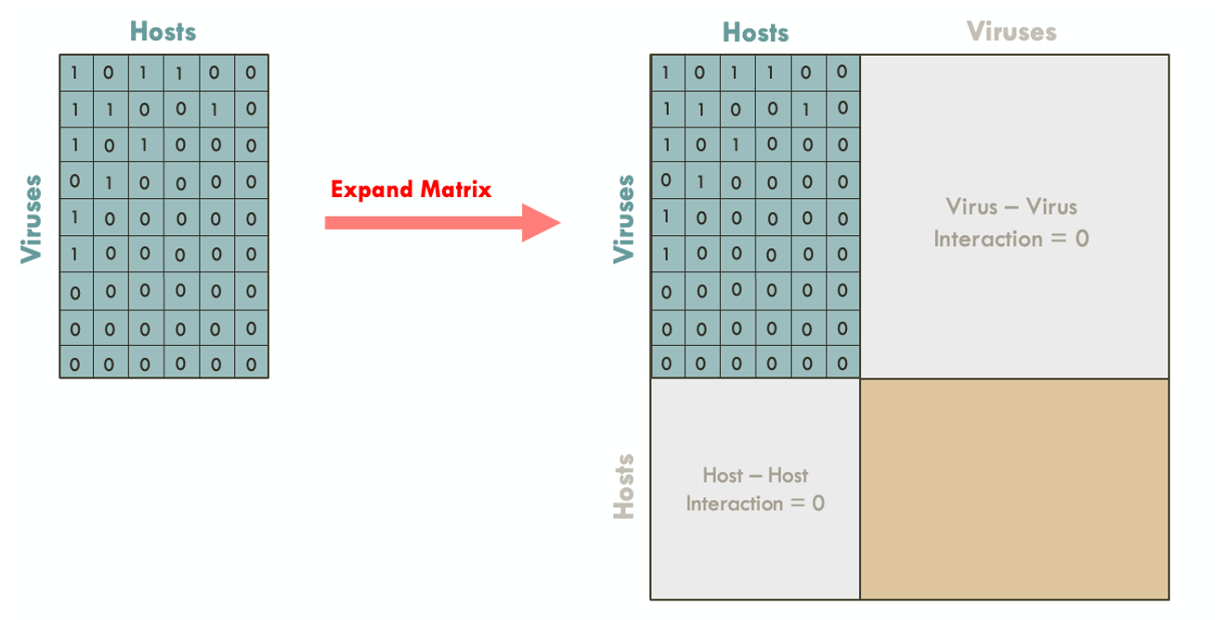

#### Below, the code shows how to transform your matrix into a square using the function. Here we used "prediction", but as with the rectangle matrix, it is possible to fill it with probabilities. 

In [30]:
aug4_data.make_square_matrix('prediction')

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

#### Now, a heatmap can be created from the rectangular matrix. Heatmaps are useful for this virus-host data, because they can tell us more information about the infection relationships in a community. Our tool sorts the columns and rows, so that patterns in the matrices are easier to observe. The image below shows examples of patterns that we might see in a virus-host matrix for a particular population.

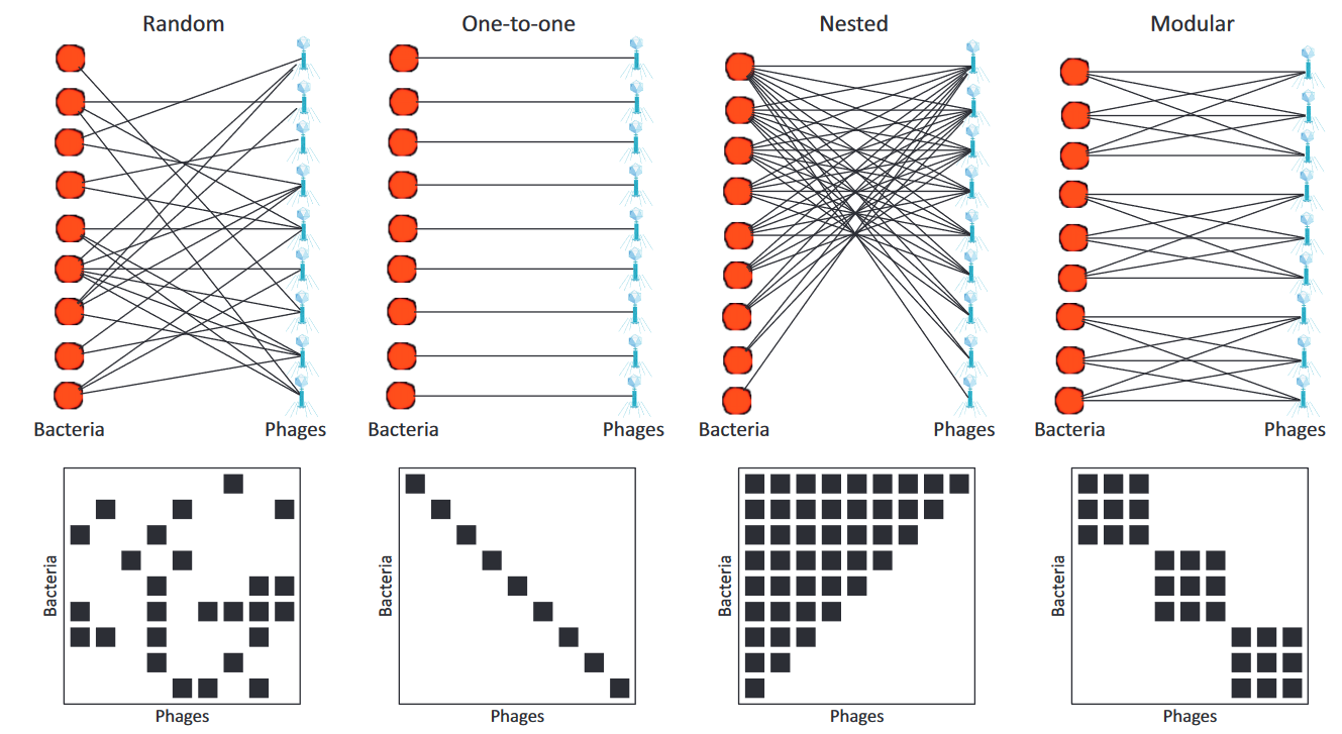

#### The plot_heatmap function takes one argument, where 'prediction' or 'probability' can be passed.

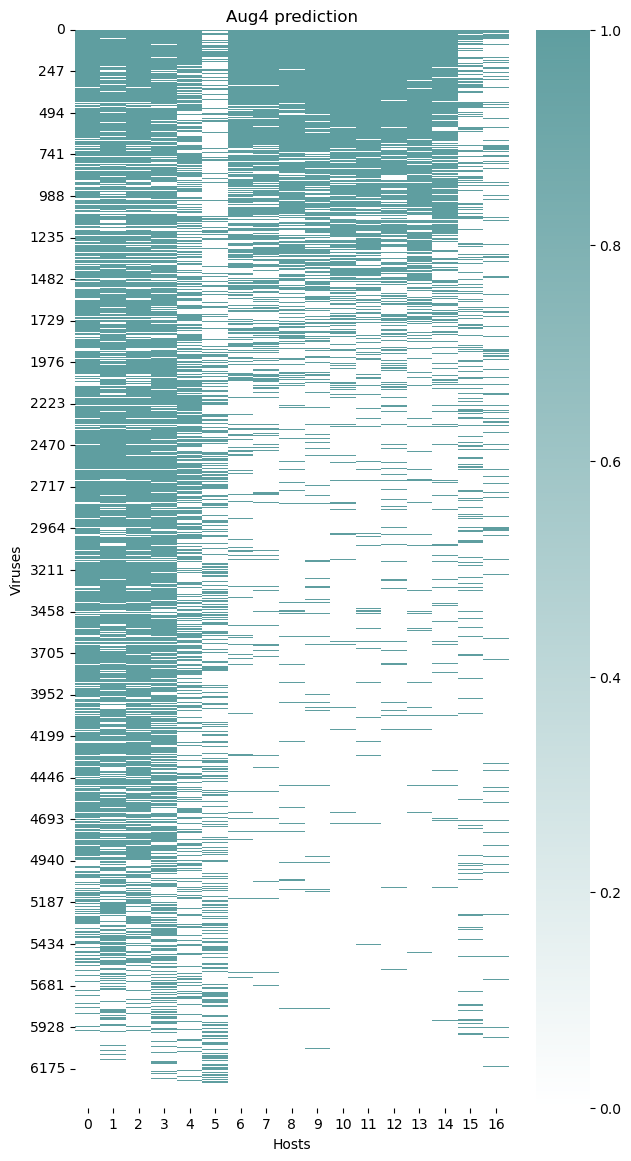

In [31]:
aug4_data.plot_heatmap('prediction')

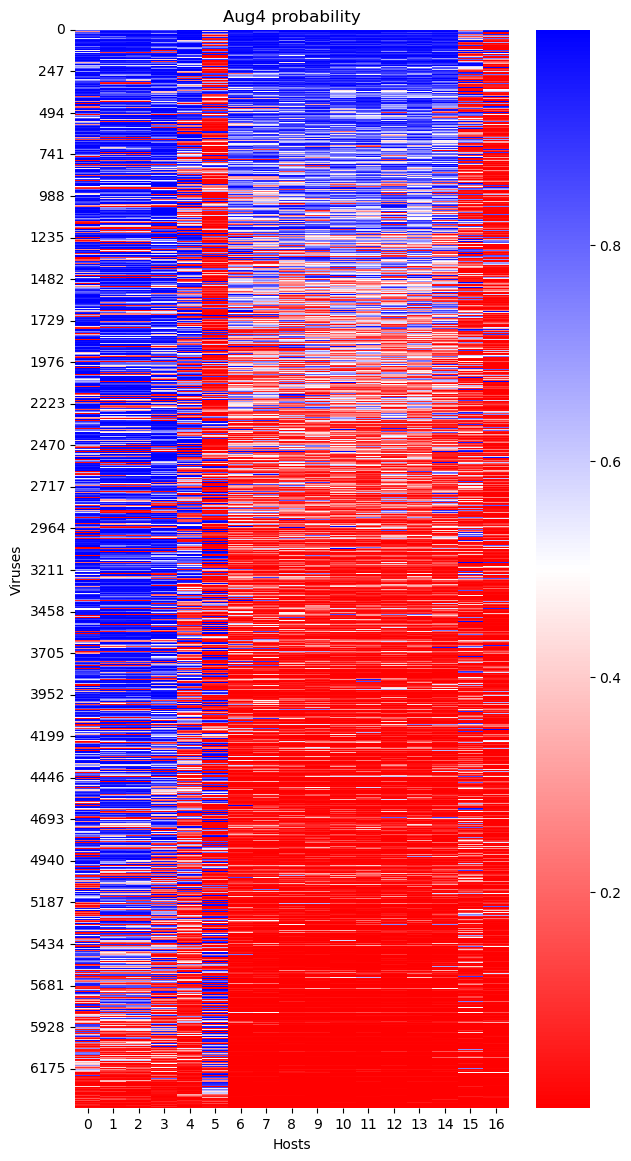

In [32]:
aug4_data.make_rectangular_matrix('probability')
aug4_data.plot_heatmap('probability')

#### This tool can also be used to build networks for the predicted virus-host pairs. First, we will create a random graph for the August 4th data using an Erdős–Rényi (ER) model. The ER model will choose virus-host pairs, choose a random p, and if that p is over a pre-set cutoff, an edge will be drawn between the two. The purpose of this random graoh is to serve as a null model for the actual network.

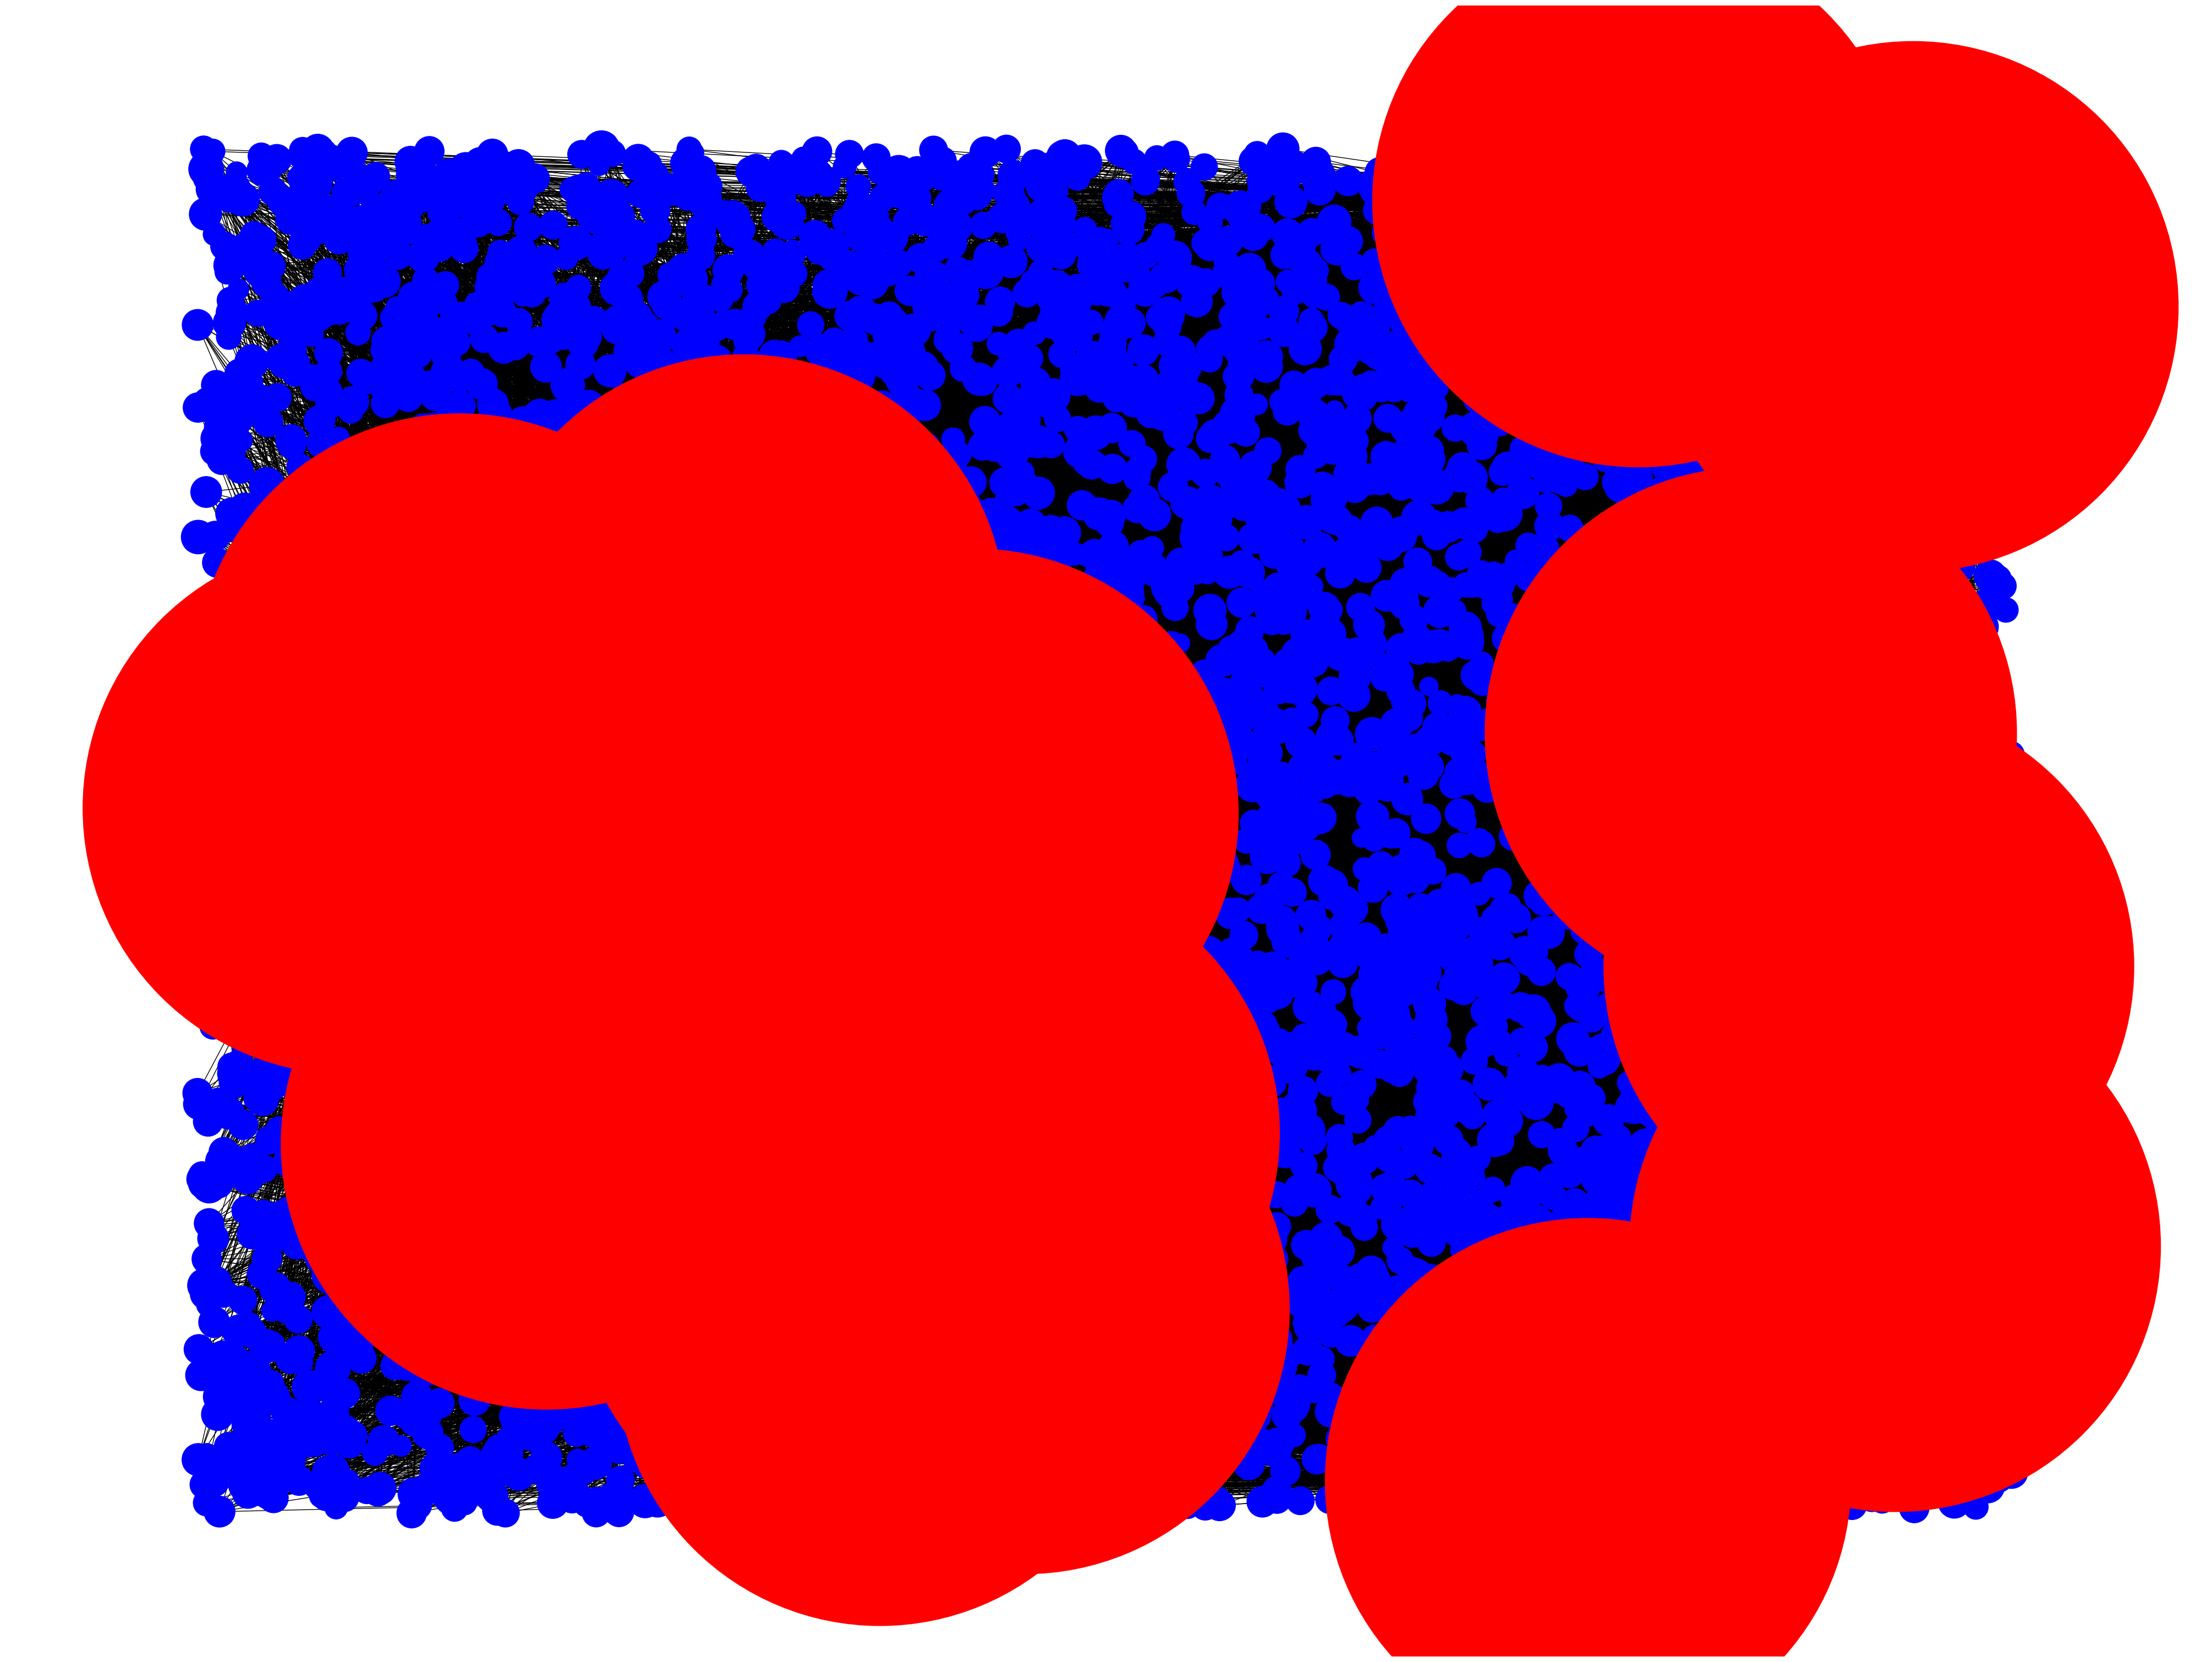

In [33]:
from VirusHostNetworkAnalysis.null_model import *
from VirusHostNetworkAnalysis.visualize import *
ER_matrix = ER(len(aug4_data.rows), len(aug4_data.columns), 0.5).fill_ER_graph()
rand_graph = Graph(ER_matrix, aug4_data.rows, aug4_data.columns)
rand_graph.draw_graph1(False)